In [1]:
import pandas as pd
import numpy as np
import re
# from sklearn.model_selection import train_test_split

# import spacy.cli
# spacy.cli.download("pt_core_news_sm")
# nlp= spacy.load('pt_core_news_sm')

# my_file = open("stopwords.txt", "r")
# stopwords = [x.strip(' ') for x in my_file.read().split('\n')]
# dfthousand = pd.read_json('../data/portal_merge_eco.json')

In [25]:
df = pd.read_json('../data/cvm_merge_eco.json')

In [26]:
df['NM_ARQ']=[x.split('.')[0]+'.txt' for x in df['NM_ARQ']]

In [29]:
def open_txt_usb(file):
#     print(file)
    try:
        try:
            with open(f'/media/mateus/F384-E080/fee/txt/{file}','r') as file:
                text = file.read()
                file.close()
                return len(text)/1000
        except FileNotFoundError:
            with open(f'/media/mateus/F384-E080/fee/txt2/{file}','r') as file:
                text = file.read()
                file.close()
                return len(text)/1000
    except FileNotFoundError:
        return 'not_downloaded'

# important match fulltext

In [30]:
df['FULL_TEXT'] = df['NM_ARQ'].apply(lambda x: open_txt_usb(x))

In [16]:
oi = df[(df['FULL_TEXT']== 'not_downloaded') | (df['FULL_TEXT']== '')]

In [36]:
df = df[(df['FULL_TEXT']!= 'not_downloaded') & (df['FULL_TEXT']== '')]

In [37]:
df.sort_values(by= 'FULL_TEXT', ascending=False)

,CNPJ_FUNDO,DENOM_SOCIAL,DT_COMPTC,TP_DOC,NM_ARQ,LINK_ARQ,Name,Employer ID number,Administrator,Series Start Date,Res 3792/4661 (acc regul),Date of regulation,FULL_TEXT


In [35]:
df[df['FULL_TEXT']==0]

,CNPJ_FUNDO,DENOM_SOCIAL,DT_COMPTC,TP_DOC,NM_ARQ,LINK_ARQ,Name,Employer ID number,Administrator,Series Start Date,Res 3792/4661 (acc regul),Date of regulation,FULL_TEXT
110,11147668000182,ACCESS USA COMPANIES FUNDO DE INVESTIMENTO EM ...,2016-04-19,REGUL FDO,20160418142539UP6ab839e25ccf4383ac83b742a09a5f...,http://sistemas.cvm.gov.br/docsrecebidos/20160...,Access Usa Companies FIA Ie,11147668000182,BNP Paribas,2010-07-28,1,2021-02-17,0
165,11409506000175,CSHG FMD FUNDO DE INVESTIMENTO EM COTAS DE FUN...,2016-05-03,REGUL FDO,20160503184155UPd6ae3f20e3c94f9597d580c4230f55...,http://sistemas.cvm.gov.br/docsrecebidos/20160...,CSHG Wm Fmd Fc FI Mult - Cred Priv Ie,11409506000175,Credit Suisse Hedging Griffo Cor Val S.A,2010-06-10,0,2021-03-02,0
166,11409506000175,CSHG FMD FUNDO DE INVESTIMENTO EM COTAS DE FUN...,2016-05-03,REGUL FDO,20160503184729UP7957091f0c7b4279ae108fb52ff2c3...,http://sistemas.cvm.gov.br/docsrecebidos/20160...,CSHG Wm Fmd Fc FI Mult - Cred Priv Ie,11409506000175,Credit Suisse Hedging Griffo Cor Val S.A,2010-06-10,0,2021-03-02,0
167,11409506000175,CSHG FMD FUNDO DE INVESTIMENTO EM COTAS DE FUN...,2016-11-29,REGUL FDO,20161129171315UP8064bead2cc742e3afcb920f77f2fb...,http://sistemas.cvm.gov.br/docsrecebidos/20161...,CSHG Wm Fmd Fc FI Mult - Cred Priv Ie,11409506000175,Credit Suisse Hedging Griffo Cor Val S.A,2010-06-10,0,2021-03-02,0
239,11991663000131,CSHG GEOMAX FUNDO DE INVESTIMENTO EM COTAS DE ...,2019-06-06,REGUL FDO,20190606193651UP3486d7fa151445c988d69774dc048b...,http://sistemas.cvm.gov.br/docsrecebidos/20190...,CSHG Geomax Fc FI Mult Cred Priv Ie,11991663000131,Credit Suisse Hedging Griffo Cor Val S.A,2010-08-04,0,2021-04-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,25036645000105,CSHG DRAGSTER II FUNDO DE INVESTIMENTO MULTIME...,2016-11-01,REGUL FDO,20161101163030UP4529dbd0544c49c98b42d1f79bc7d8...,http://sistemas.cvm.gov.br/docsrecebidos/20161...,CSHG Dragster II FI Mult Cred Priv Ie,25036645000105,Credit Suisse Hedging Griffo Cor Val S.A,2016-10-25,0,2016-11-01,0
18846,19250685000152,RIO FORMOSO FUNDO DE INVESTIMENTO EM DIREITOS ...,2016-04-04,REGUL FDO,20171030174246UP3ef08bf3026a4e199ae65c371e56fe...,http://sistemas.cvm.gov.br/docsrecebidos/20171...,Rio Formoso FIDC Np-Sen,19250685000152,Intrader Dtvm Ltda,2017-05-24,0,-,0
18855,18636135000103,POWER I FUNDO DE INVESTIMENTO EM PARTICIPA��ES...,2016-05-27,REGUL FDO,20160602200159UPafea84e991e94a509d90047f04a6bf...,http://sistemas.cvm.gov.br/docsrecebidos/20160...,Power I FIP,18636135000103,Brookfield Brasil Asset Management,2019-07-04,0,-,0
18856,18636135000103,POWER I FUNDO DE INVESTIMENTO EM PARTICIPA��ES...,2016-10-27,REGUL FDO,20161028182102UPeac778c4291c4542a724af21e61b1e...,http://sistemas.cvm.gov.br/docsrecebidos/20161...,Power I FIP,18636135000103,Brookfield Brasil Asset Management,2019-07-04,0,-,0


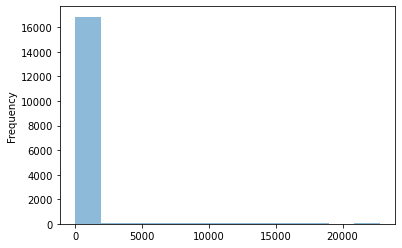

In [32]:
ax = pd.to_numeric(df['FULL_TEXT']).plot.hist(bins=12, alpha=0.5)

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = list(df['FULL_TEXT'])

# fixed bin size
bins = np.arange(min(data), max(data), 15) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

# removing white spaces, stop words and concating number to percentages

In [14]:
# def cleaner_and_stopremover(text):
# #     text=''.join(text)

#     ctext=text.lower()
# #     ctext=re.sub(r'\n', r' ',ctext)
#     ctext=re.sub(r'(\d)\s+(%)', r'\1\2',ctext)
#     ctext=' '.join(ctext.split())

#     nonstop=[]    
#     for word in ctext.split():
#         if word not in stopwords:
#             nonstop.append(word)
            
# #     return ctext
#     return ' '.join(nonstop)

In [ ]:

# dfthousand=pd.read_json('./dfthousand_with_clean_text.json')
# dfthousand['cleanfulltext']=[cleaner_and_stopremover(z) for z in dfthousand['fulltext']]
df.to_json('./df_with_clean_text.json')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dfthousand['cleanfulltext'], np.array(pd.get_dummies(dfthousand['fee'])), test_size=0.33, random_state=42)

In [18]:
y_test.shape

(205, 71)

In [20]:

def x_2_vec(x):
    x_vec=np.zeros((24307,96))
    for wordidx, word in enumerate(nlp(x)):
        x_vec[wordidx]=word.vector
    
x_2_vec(X_test)

def y_2_vec(y):
    
    nlp(y).vector

# y_train2vec=np.zeros((416,96))
# for fileidx, file in enumerate(list(y_train.replace('-','não'))):
    
#     for wordidx ,word in enumerate(nlp(file)):
#         y_train2vec[fileidx]=word.vector



TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [ ]:
print(len(X_train),len(X_test))

In [21]:
X_train2vec=np.zeros((416,24307,96))

for fileidx, file in enumerate(X_train):
#     print(file)
#     temp_np=np.zeros((len(file.split()),300))
#     print(len(file.split()))
    for wordidx ,word in enumerate(nlp(file)):
#         print(word)
# #         print(wordidx)
        X_train2vec[fileidx][wordidx]=word.vector
#     print(temp_np)
#     print('------------------------')
# #         print(j.vector.shape)
np.save('./np_vecs/spacy/X_train', X_train2vec)



In [22]:
X_test2vec=np.zeros((205,24307,96))

for fileidx, file in enumerate(X_test):
#     print(file)
#     temp_np=np.zeros((len(file.split()),300))
#     print(len(file.split()))
    for wordidx ,word in enumerate(nlp(file)):
#         print(word)
# #         print(wordidx)
        X_test2vec[fileidx][wordidx]=word.vector
#     print(temp_np)
#     print('------------------------')
# #         print(j.vector.shape)
np.save('./np_vecs/spacy/X_test', X_test2vec)

In [26]:
# y_train2vec=np.zeros((416,96))
# for fileidx, file in enumerate(list(y_train.replace('-','não'))):
    
#     for wordidx ,word in enumerate(nlp(file)):
#         y_train2vec[fileidx]=word.vector
        
np.save('./np_vecs/spacy/y_train', y_train)
    
    
# y_test2vec=np.zeros((205,96))
# for fileidx, file in enumerate(list(y_test.replace('-','não'))):
    
#     for wordidx ,word in enumerate(nlp(file)):
#         y_test2vec[fileidx]=word.vector
        
np.save('./np_vecs/spacy/y_test', y_test)

In [ ]:
xa=np.array([1,2,30])
ya=np.array([1,2,30])
np.random.seed(42) 
np.random.shuffle(xa)
np.random.shuffle(ya)
print(xa,ya)

In [ ]:
df =pd.DataFrame({'X':cleanfulltext2vec, 'Y':y2vec})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleanfulltext2vec, y2vec, test_size=0.33, random_state=42)

In [ ]:
np.save('./np_vecs/spacy/X_train', X_train)
np.save('./np_vecs/spacy/X_test', X_test)
np.save('./np_vecs/spacy/y_train', y_train)
np.save('./np_vecs/spacy/y_test', y_test)

In [ ]:
# np.save('./np_vecs/spacy/cleanfulltext2vec', cleanfulltext2vec)